In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

file_path = 'D600 Task 1 Dataset 1 Housing Information.csv'

df = pd.read_csv(file_path)

print(df)

        ID        Price  SquareFootage  NumBathrooms  NumBedrooms  \
0     4922  255614.8992         566.62      1.000000            4   
1     5009  155586.0947        1472.34      1.000000            2   
2     4450  131050.8324         550.00      1.779354            3   
3     1070  151361.7125         941.81      2.035254            2   
4      400  113167.6128         550.00      1.064644            3   
...    ...          ...            ...           ...          ...   
6995  6987  307821.1758         550.00      2.111022            4   
6996  6995  421368.8869        1726.12      4.056115            2   
6997  6996  473382.5348        1026.36      2.077177            5   
6998  6998  343397.9756        2218.22      1.000000            4   
6999  7000  438060.8193        1553.57      3.988377            4   

      BackyardSpace  CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  \
0            779.42      20.56          5.62      39.46                 10.08   
1        

In [54]:
# c2 

# Descriptive stats for independent variable and dependent variable

variable = ['Price', 'SquareFootage', 'CrimeRate']
stats = df[variable].describe()

# ٍResults
print(stats)

              Price  SquareFootage    CrimeRate
count  7.000000e+03    7000.000000  7000.000000
mean   3.072820e+05    1048.947459    31.226194
std    1.501734e+05     426.010482    18.025327
min    8.500000e+04     550.000000     0.030000
25%    1.921075e+05     660.815000    17.390000
50%    2.793230e+05     996.320000    30.385000
75%    3.918781e+05    1342.292500    43.670000
max    1.046676e+06    2874.700000    99.730000


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


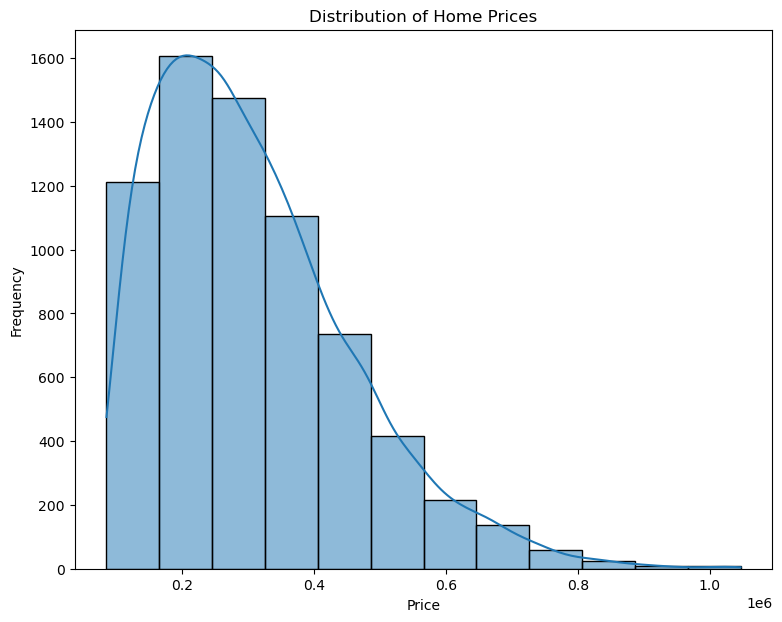

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


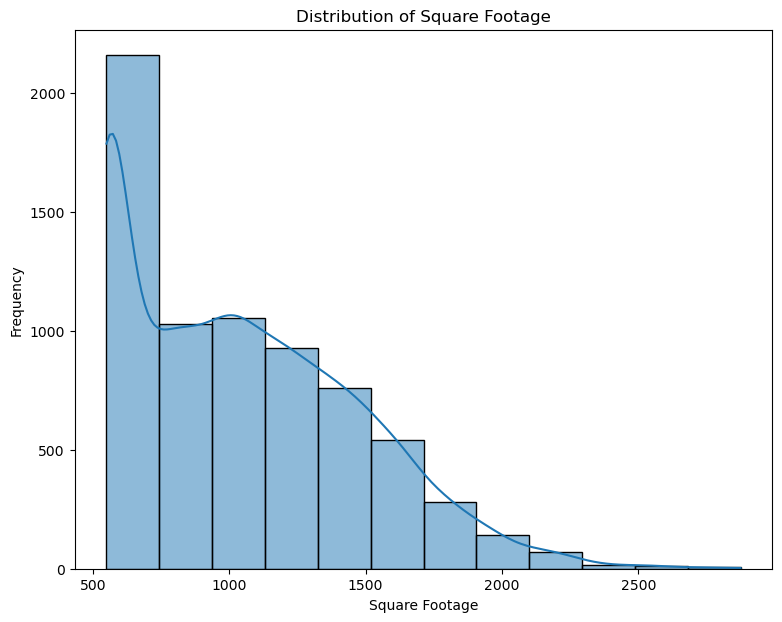

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


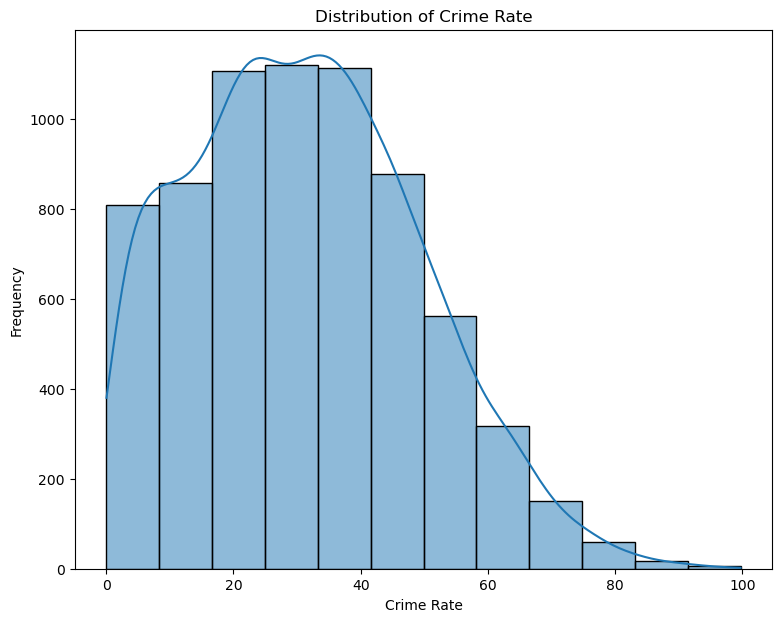

In [55]:
# c3

#Univariate visualizations
#Histogram of Price Distribution

plt.figure(figsize = (9,7))
sns.histplot(df['Price'], kde = True, bins = 12)
plt.title('Distribution of Home Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of Square footage distribution
plt.figure(figsize = (9,7))
sns.histplot(df['SquareFootage'], kde = True, bins = 12)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()

# Histogram of Crime rate distribution 
plt.figure(figsize = (9,7))
sns.histplot(df['CrimeRate'], kde = True, bins = 12)
plt.title('Distribution of Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()

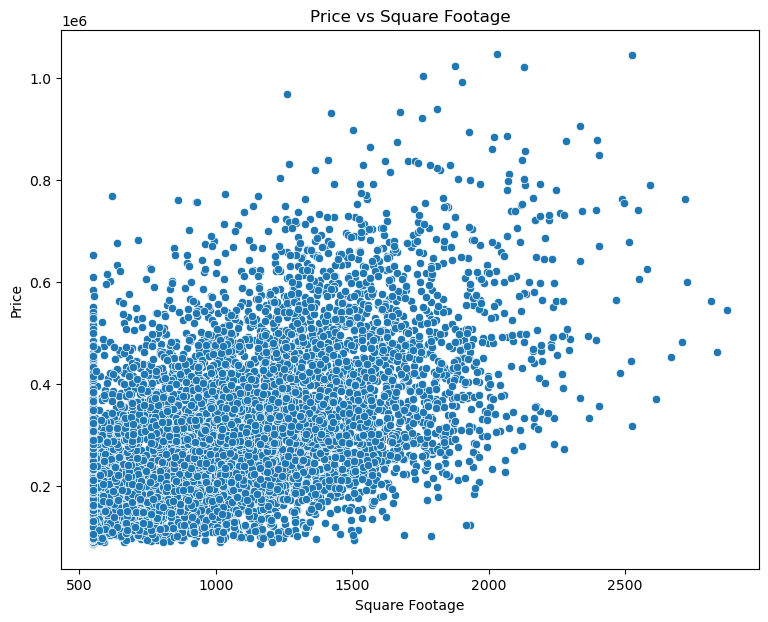

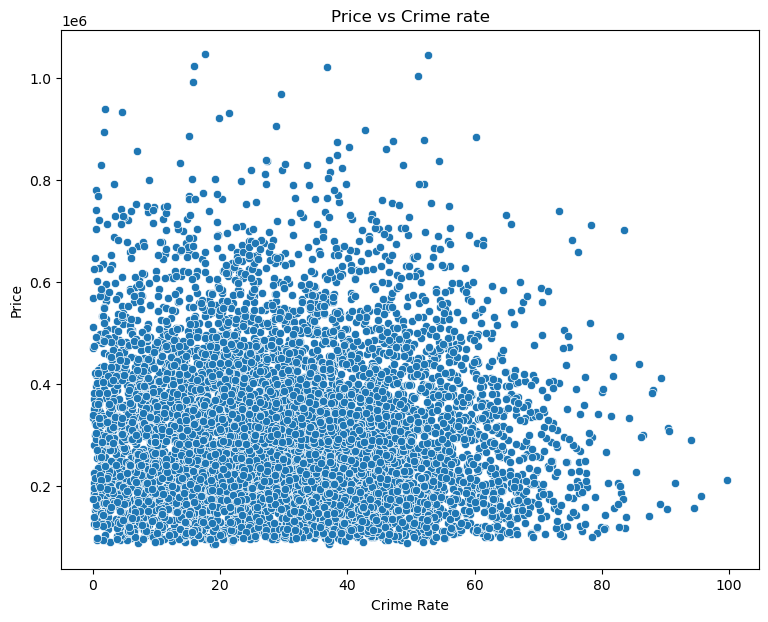

In [56]:
# Visualizations of Bivariate

# Scatterplot showing Square Footage vs Price

plt.figure(figsize = (9,7))
sns.scatterplot( x = 'SquareFootage', y = 'Price', data = df)
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

# Scatterplot showing Price vs Crime Rate

plt.figure(figsize = (9,7))
sns.scatterplot( x = 'CrimeRate', y = 'Price', data = df)
plt.title('Price vs Crime rate')
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

In [57]:
# D1

# Test, train, split using 80/20 test

train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 1)

#Results
print("Test dataset shape:", test_df.shape)
print("Train dataset shape:", train_df.shape)

Test dataset shape: (1400, 22)
Train dataset shape: (5600, 22)


In [58]:
# d2

# Defining the independent and dependent variables
x_train = train_df[['SquareFootage', 'CrimeRate']]
y_train = train_df[['Price']]

# Constant
x_train = sm.add_constant(x_train)

# Regression model
model = sm.OLS(y_train, x_train).fit()

In [59]:
# Optimization

# Chosen Method: Backward Elimination
def backward_elimination(x, y, significance_level = 0.05):
    x = sm.add_constant(x)
    while True:
        model = sm.OLS(y,x).fit()
        p_values = model.pvalues
        max_p_values = p_values.max()
        if max_p_values >= significance_level:
            x = x.drop(p_values_idxmax(), axis = 1)
        else:
            break
    return model

# Define our optimum model as the new data after chosen method

optimized = backward_elimination(x_train, y_train)

optimized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     1233.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:42:30   Log-Likelihood:                -73721.
No. Observations:                5600   AIC:                         1.474e+05
Df Residuals:                    5597   BIC:                         1.475e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.115e+05   5470.947     20.385      0.000    1.01e+05    1.22e+05
SquareFootage   195.7358      3.964     49.374      0.000     187.964     203.507
CrimeRate      -296.4352     93.237     -3.179      0.001    -479.216    -113.654
==============================================================================
Omnibus:                      548.558   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              757.418
Skew:                           0.788   Prob(JB):                    3.38e-165
Kurtosis:                       3.874   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# D3
# Mean squared error on the training set
y_train_pred = optimized.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)

# Results
mse_train

15925859361.683376

In [62]:
# D4
# Run prediction using D2 to get accuracy 

x_test = test_df[['SquareFootage', 'CrimeRate']]
y_test = test_df[['Price']]

# Add a constant
x_test = sm.add_constant(x_test)

# Run prediction on model
y_test_prediction = optimized.predict(x_test)

y_test_prediction

2305    216311.585063
4388    417573.267632
1686    235250.906426
4945    304947.805754
4197    364773.585495
            ...      
2090    366236.166544
997     239730.675196
4672    243954.776073
3152    235383.196054
5823    293895.932714
Length: 1400, dtype: float64

In [65]:
#Comparing actual vs predicted prices
df_prediction = pd.DataFrame({
    'Actual Price': y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten(),
    'Predicted Price': y_test_prediction.values.flatten() if hasattr(y_test_prediction, 'values') else y_test_prediction.flatten()
})

# Display new dataframe
df_prediction

,Actual Price,Predicted Price
0,184107.5474,216311.585063
1,376148.7559,417573.267632
2,188820.5790,235250.906426
3,298752.8523,304947.805754
4,464444.5259,364773.585495
...,...,...
1395,200241.5569,366236.166544
1396,231996.9865,239730.675196
1397,402906.3189,243954.776073
1398,228139.8188,235383.196054


In [66]:
mse = mean_squared_error(df_prediction['Actual Price'], df_prediction['Predicted Price'])

mse

15171689294.63004

In [67]:
# Calculate Variance Inflation Factor for the predictor variables

data_vif = pd.DataFrame()
data_vif['Feature'] = x_train.columns
data_vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

print(data_vif)

         Feature        VIF
0          const  10.519074
1  SquareFootage   1.001908
2      CrimeRate   1.001908
